Brief description of the data set and a summary of its attributes
-	This dataset shows the year, time (date) and region of different types of avocados. The attributes are date, average price, type, year, region, total volume (total avocados sold), 4046 (total number of avocados with PLU 4046 sold), 4225 (total number of avocados with PLU 40225 sold), 4770 (total number of avocados with PLU 4770 sold. 

Initial plan for data exploration
-	Initial idea for data exploration is to look at the summary statistics (average, median min, max) and have a visualization of the data (histogram, scatter plot).
-	Look at columns, datatypes, null values 

Actions taken for data cleaning and feature engineering
-	Data cleaning: remove duplicates, null values, observing outliers
-	I also decided to drop the date and "Unnamed:0” column as they were not relevant. 

Key Findings and Insights, which synthesizes the results of Exploratory Data Analysis in an insightful and actionable manner
-	As the years progressed, the average price of the organic avocado went up at a higher rate than the conventional ones
-	The total bags seem to increase for the conventional avocados, but not the organic

Formulating at least 3 hypothesis about this data
-	I think there is a relationship between small bags and average price
-	I think there is a relationship between year and large bags
-	I think there is a relationship between year and average price

Conducting a formal significance test for one of the hypotheses and discuss the results 
-	Hypothesis: As the year increases, the price also increases
o	If this is the hypothesis, then the null hypothesis is that there is no relationship between the price and the year
o	The alternative hypothesis is that there is a relationship between the price and the year.
-	When calculating the p-value using stats from scipy library, we can see that the p-value is 1.71314527145835e-36, which is less than  (which is 0.05), so that means we will reject the null hypothesis. 
-	This means that the alternative hypothesis is true, so there is a relationship between the price of the avocado and year. 
-	It is important to note that a pearson’s coefficient value (r) was also calculated, and it appears to be 0.093197. This implies that there is a weak positive relationship between the two. 

Suggestions for next steps in analyzing this data
-	It would be a good step to cut down the dataset into smaller data frames to be able to observe more patterns and relationships

A paragraph that summarizes the quality of this data set and a request for additional data if needed
-	This dataset was fairly decent quality, as the datapoints appeared to be reliable (checked a few sources). It would have been a lot easier to categorize the regions differently (have “eastern, western, norther, southern” instead of just individual states). This would have made it easier to see patterns in the general areas. It would have also been cool to see the average temperatures/season for that region, so that way a comparison could be made between the season (based on temperature) and the price and year etc. 


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
filepath = "avocado.csv"
data = pd.read_csv(filepath)
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [45]:
data.drop(['Unnamed: 0', 'Date'], axis=1, inplace=True)

In [46]:
stats_df = data.describe()
stats_df = data.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']

out_fields = ['mean',
              '25%','50%','75%', 'range']
stats_df = stats_df.loc[out_fields]
stats_df.rename({'50%': 'median'}, inplace=True)
stats_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
median,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
range,2.810000,6.250556e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,3.000000


<AxesSubplot:>

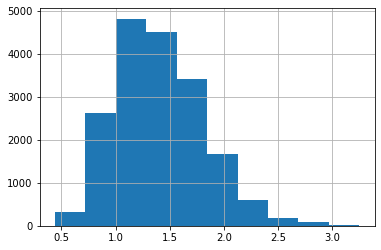

In [47]:
data['AveragePrice'].hist()

type
conventional    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
organic         [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

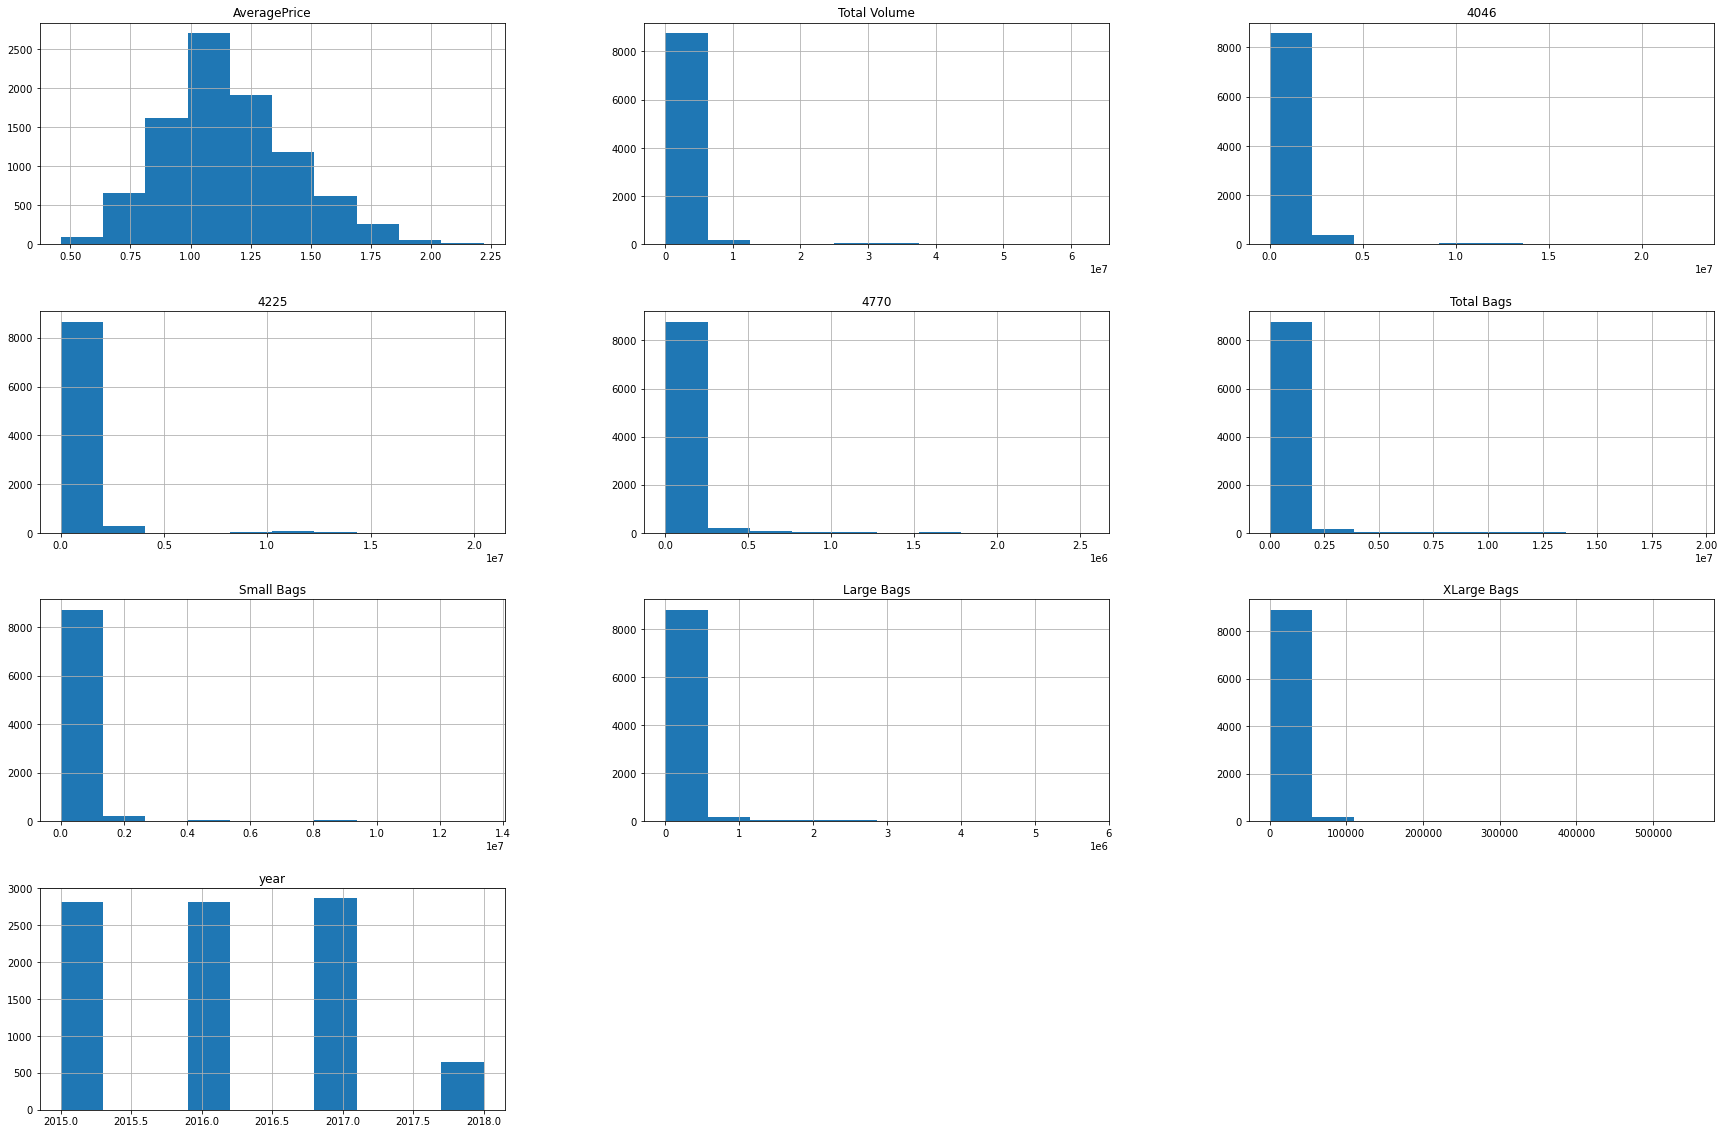

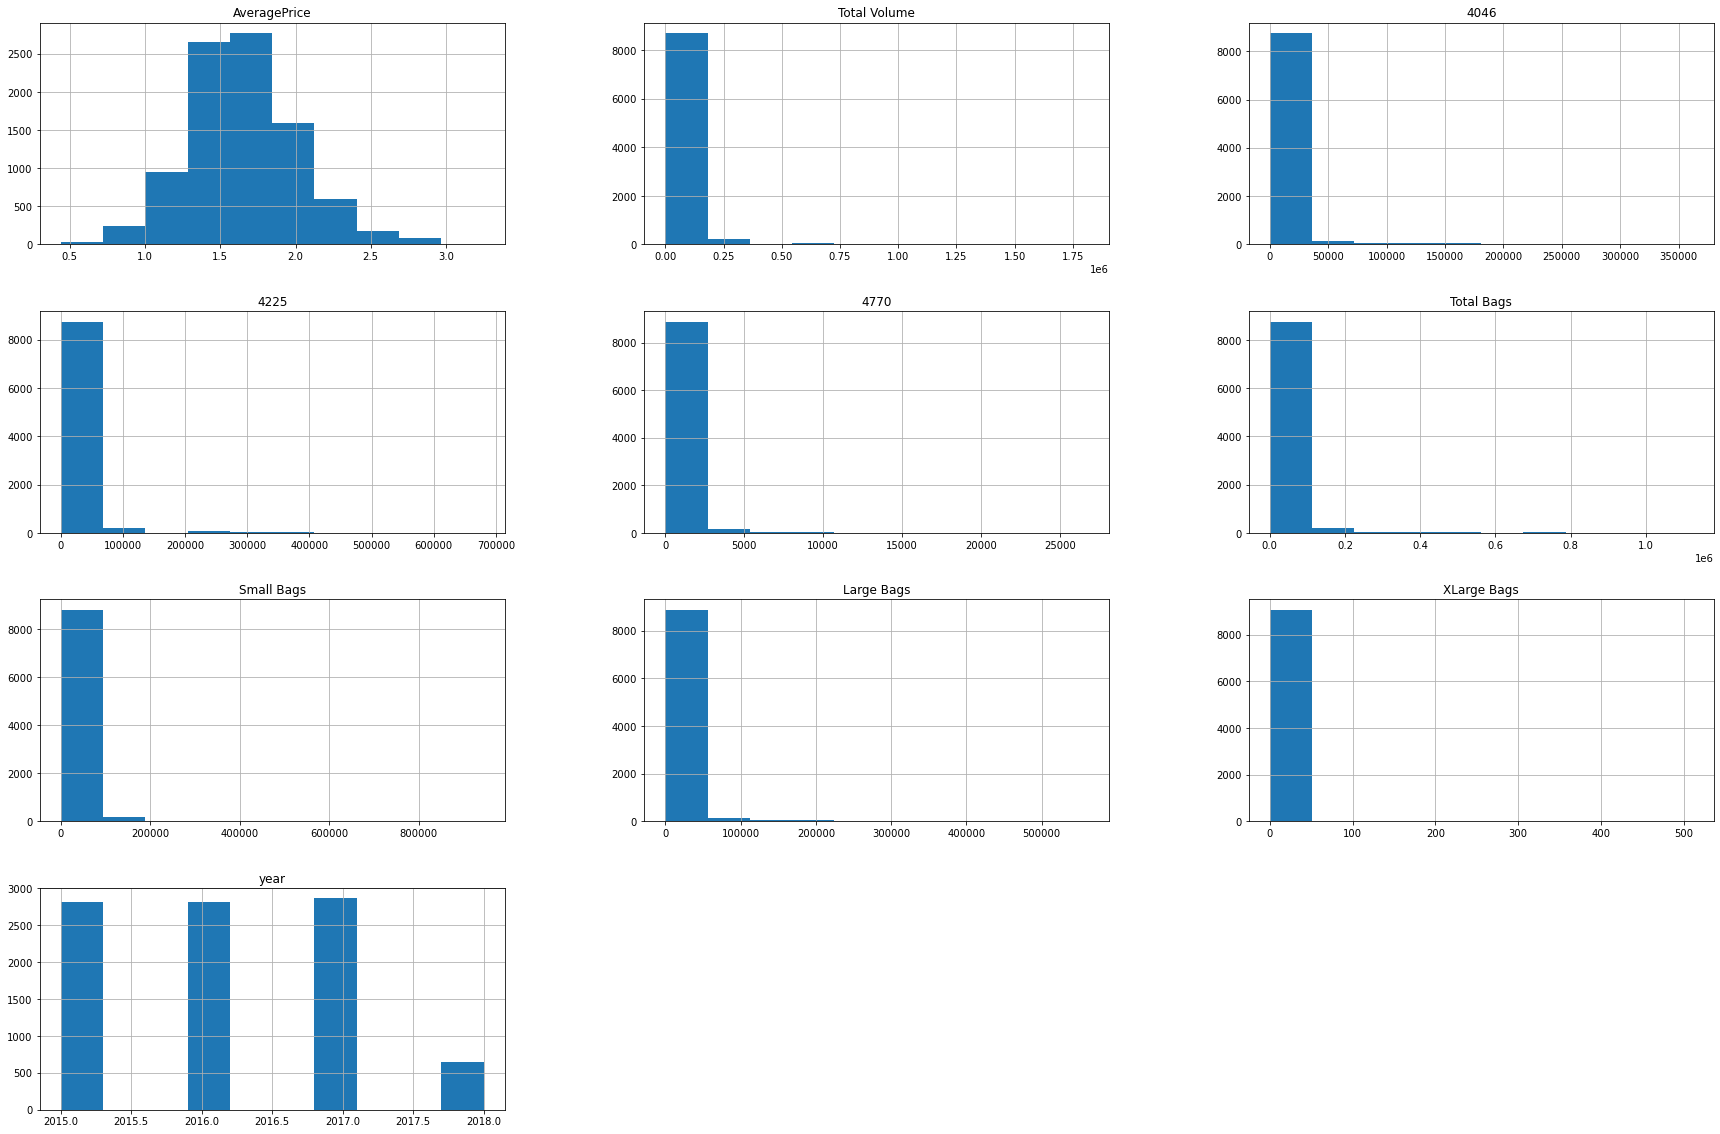

In [52]:
data.groupby('type').hist(figsize=(30,20))

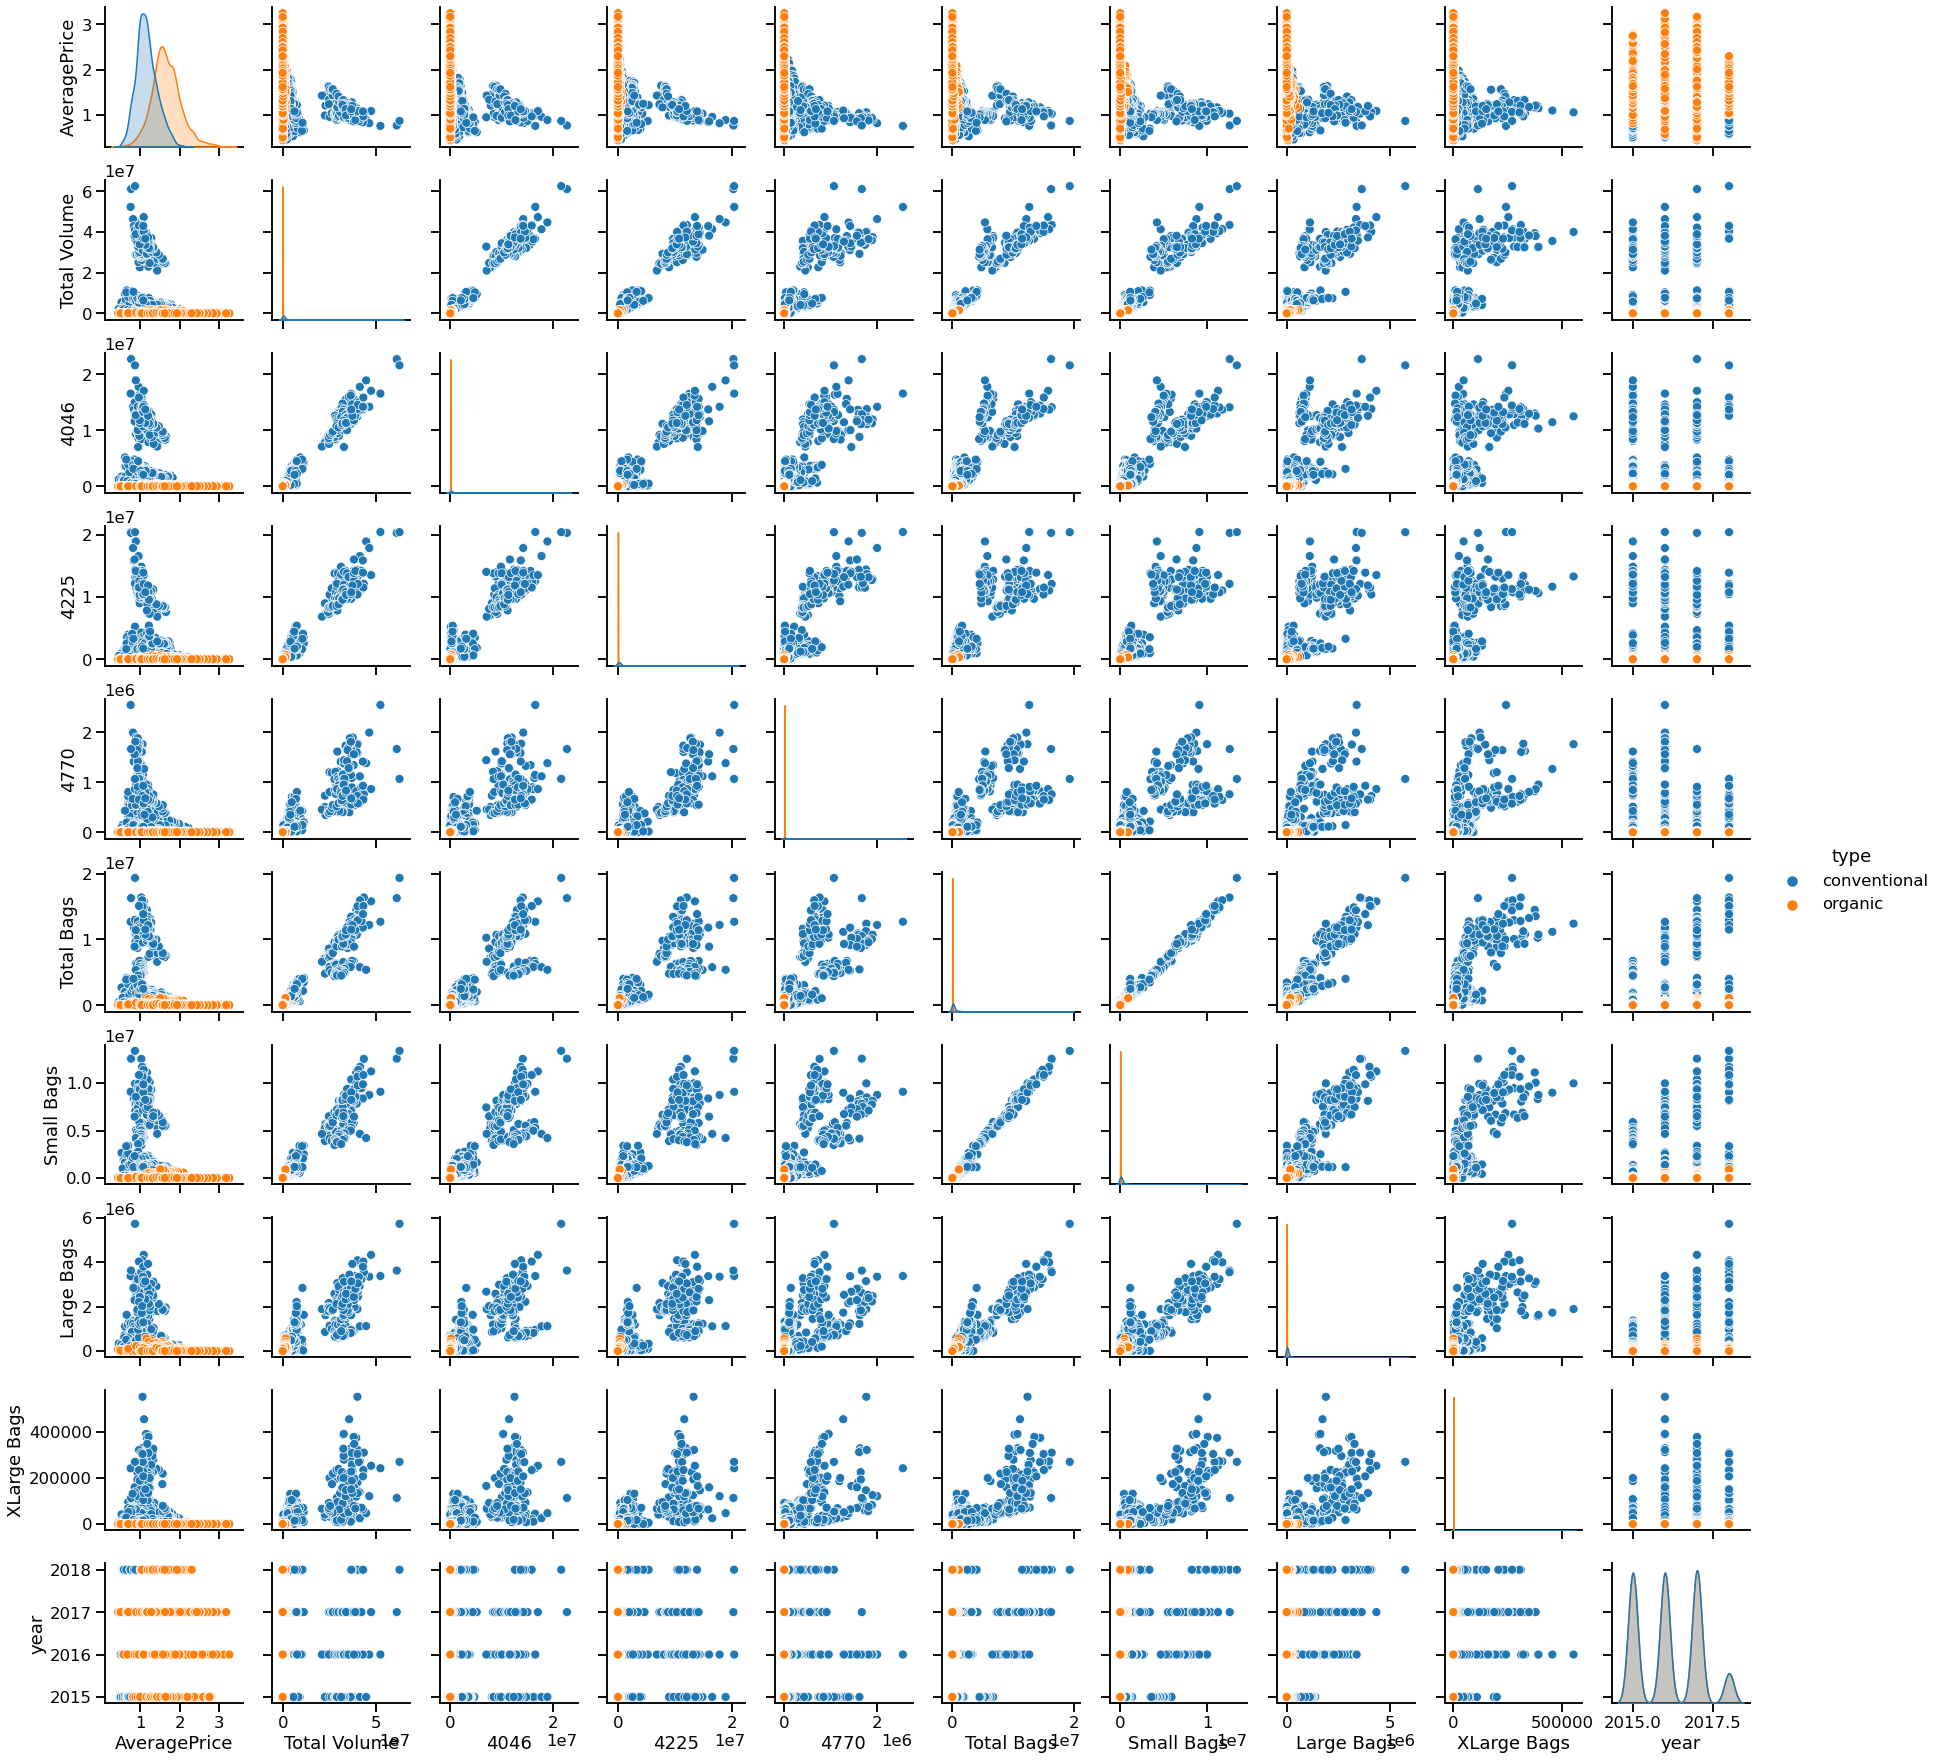

In [58]:
import seaborn as sns
sns.set_context('notebook')

### BEGIN SOLUTION
sns.set_context('talk')
sns.pairplot(data, hue='type');
### END SOLUTION

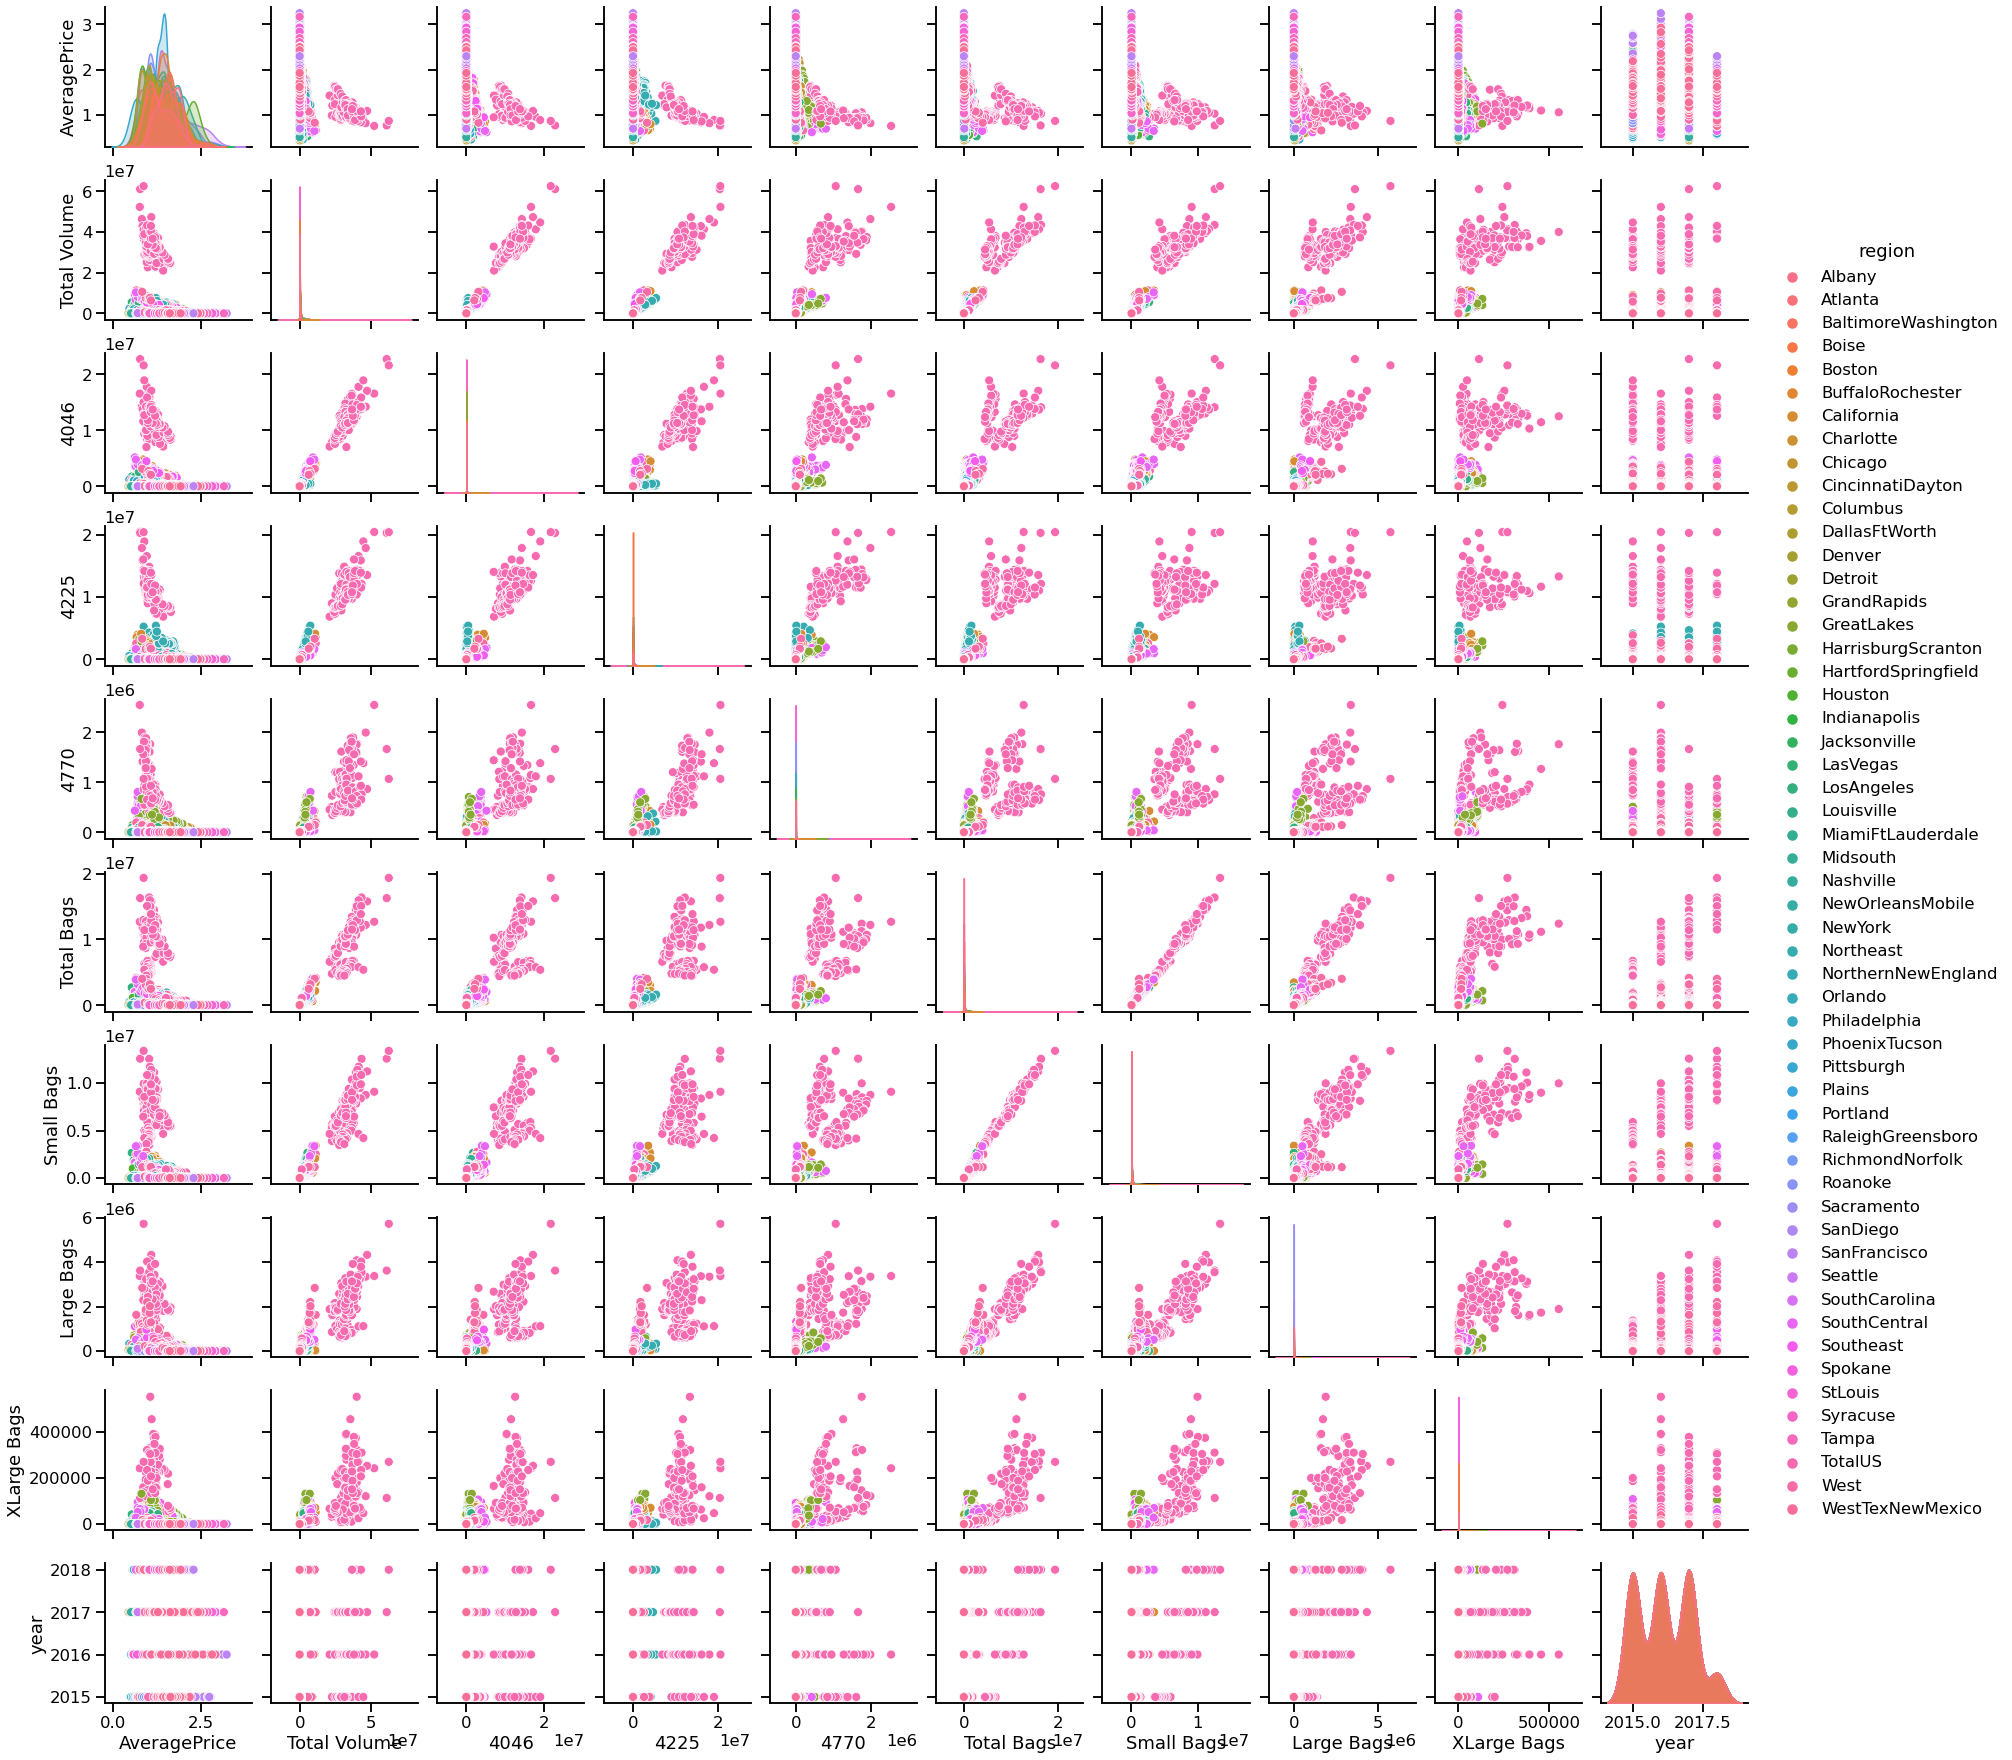

In [62]:
sns.set_context('talk')
sns.pairplot(data, hue='region');

calculate pearson's coefficent

In [63]:
data.corr(method ='pearson')

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


In [68]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(data["AveragePrice"], data["year"])

In [69]:
print(slope, intercept, r_value, p_value, std_err
     )

0.21754291083679098 2015.842037879151 0.09319698370758493 1.71314527145835e-36 0.017204934869919464


In [70]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
   print(" we are rejecting null hypothesis")
else:
  print("we are accepting null hypothesis")

 we are rejecting null hypothesis


In [71]:
!export PATH=/Library/TeX/texbin:$PATH
